**Importing Libraries**

In [1]:
# Pandas for dataframe and data manipulation
import pandas as pd
import numpy as np

# Matplotlib for plotting/visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn import preprocessing
label = preprocessing.LabelEncoder()    # for encoding text data

# For statistical analysis
from scipy import stats
from scipy.stats import ttest_ind

# For data scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA    # dimensionality reduction
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# load the dataset
df_1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/Fiverr/knn_5_imputed_dataset.xlsx")

In [3]:
pathway_pro_82 = [
    "Samples","Gender", "Age_Group", "ABCC6", "ACBD5", "AFG3L2", "AIPL1", "ALMS1", "APOD", "APOE", "ARL2BP", "ARL6", "ARMS2",
    "ARSG", "BBS10", "BBS2", "BEST1", "C2", "C3", "C8orf37", "CABP4", "CACNA1F", "CAPN5",
    "CC2D2A", "CFB", "CFD", "CFHR1", "CHM", "CLCC1", "CLN3", "CLRN1", "CLUAP1", "CNGB3",
    "CNNM4", "COX2", "CYSLT1R", "ESPN", "GRK1", "GUCY2D", "HGSNAT", "HMCN1", "IFT27", "IMPG1",
    "ITM2B", "KLHL7", "LCA5", "LRAT", "LRP5", "LTB4R", "LTE4", "LZTFL1", "MYO7A", "NDP",
    "NEK2", "NPHP1", "NR2E3", "NRL", "PCARE", "PCDH15", "PDE6B", "PDE6C", "PDZD7", "PEX7",
    "POC1B", "PRDM13", "PROM1", "PRPF4", "RB1", "RDH5", "REEP6", "RGR", "RGS9BP", "RLBP1",
    "RP1L1", "RPGR", "SAG", "SDCCAG8", "TIMP3", "TSPAN12", "TTC8", "TUBGCP4", "TUBGCP6",
    "USH2A", "VEGFA", "WDPCP"]


In [4]:
# pathways

Inflammation = ["COX2", "CFB", "CFD", "CFHR1", "TIMP3", "VEGFA", "LTB4R", "LTE4"]

Oxidative_Stress = ["APOD", "APOE", "ARSG", "HMCN1"]

Immunity = ["C2", "C3"]

Apoptosis = ["CAPN5", "TIMP3", "RB1"]

Aging = ["APOE", "ARMS2", "PRPF4", "GRK1"]

Visual_Perception = ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"]

Ciliopathy = ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"]

Lipid_Metabolism = ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"]

Cellular_Transport = ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"]

Signal_Transduction = ["NEK2", "PRDM13", "TSPAN12"]


In [5]:
# Create a new dataset with pathway specific proteins
df_pathway = df_1[pathway_pro_82]

df_visual_perception = df_pathway[Visual_Perception]

# Concatenate the additional columns
df_visual_perception = pd.concat([df_pathway[["Samples", "Gender", "Age_Group"]], df_visual_perception], axis=1)

In [6]:
df_visual_perception.head() # display dataset's 1st 5 rows

,Samples,Gender,Age_Group,CNGB3,GRK1,GUCY2D,PDE6B,PDE6C,RGS9BP,SAG,RGR,RP1L1,RPGR,NRL,AIPL1,CABP4,BEST1,CLRN1,RLBP1
0,1_50:60_F,Female,50-60,146.0,168.0,264.0,197.0,183.0,266.2,82.0,211,180.0,234.4,236.2,151.0,184.0,143.0,233.4,162.4
1,2_50:60_F,Female,50-60,154.0,166.0,276.0,201.0,192.0,270.0,84.0,219,167.0,234.2,225.0,150.0,185.0,138.0,228.0,160.0
2,3_40:50_F,Female,40-50,166.0,165.0,261.0,194.0,192.0,274.6,98.2,223,168.0,240.0,225.0,144.0,182.0,122.0,231.8,164.8
3,4_40:50_F,Female,40-50,158.0,164.0,278.0,195.0,205.0,260.4,98.0,226,182.0,234.8,237.4,145.0,193.4,139.6,250.0,158.4
4,5_50:60_F,Female,50-60,159.2,157.0,267.0,190.0,206.0,273.0,109.0,212,182.0,237.0,223.0,161.6,198.0,131.6,238.0,155.0


In [7]:
print(df_visual_perception.shape)   # dataset rows & columns
df_visual_perception.columns        # columns of the dataset

(500, 19)


Index(['Samples', 'Gender', 'Age_Group', 'CNGB3', 'GRK1', 'GUCY2D', 'PDE6B',
       'PDE6C', 'RGS9BP', 'SAG', 'RGR', 'RP1L1', 'RPGR', 'NRL', 'AIPL1',
       'CABP4', 'BEST1', 'CLRN1', 'RLBP1'],
      dtype='object')

In [8]:
df_visual_perception.info()     # details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Samples    500 non-null    object 
 1   Gender     500 non-null    object 
 2   Age_Group  500 non-null    object 
 3   CNGB3      500 non-null    float64
 4   GRK1       500 non-null    float64
 5   GUCY2D     500 non-null    float64
 6   PDE6B      500 non-null    float64
 7   PDE6C      500 non-null    float64
 8   RGS9BP     500 non-null    float64
 9   SAG        500 non-null    float64
 10  RGR        500 non-null    int64  
 11  RP1L1      500 non-null    float64
 12  RPGR       500 non-null    float64
 13  NRL        500 non-null    float64
 14  AIPL1      500 non-null    float64
 15  CABP4      500 non-null    float64
 16  BEST1      500 non-null    float64
 17  CLRN1      500 non-null    float64
 18  RLBP1      500 non-null    float64
dtypes: float64(15), int64(1), object(3)
memory usage: 

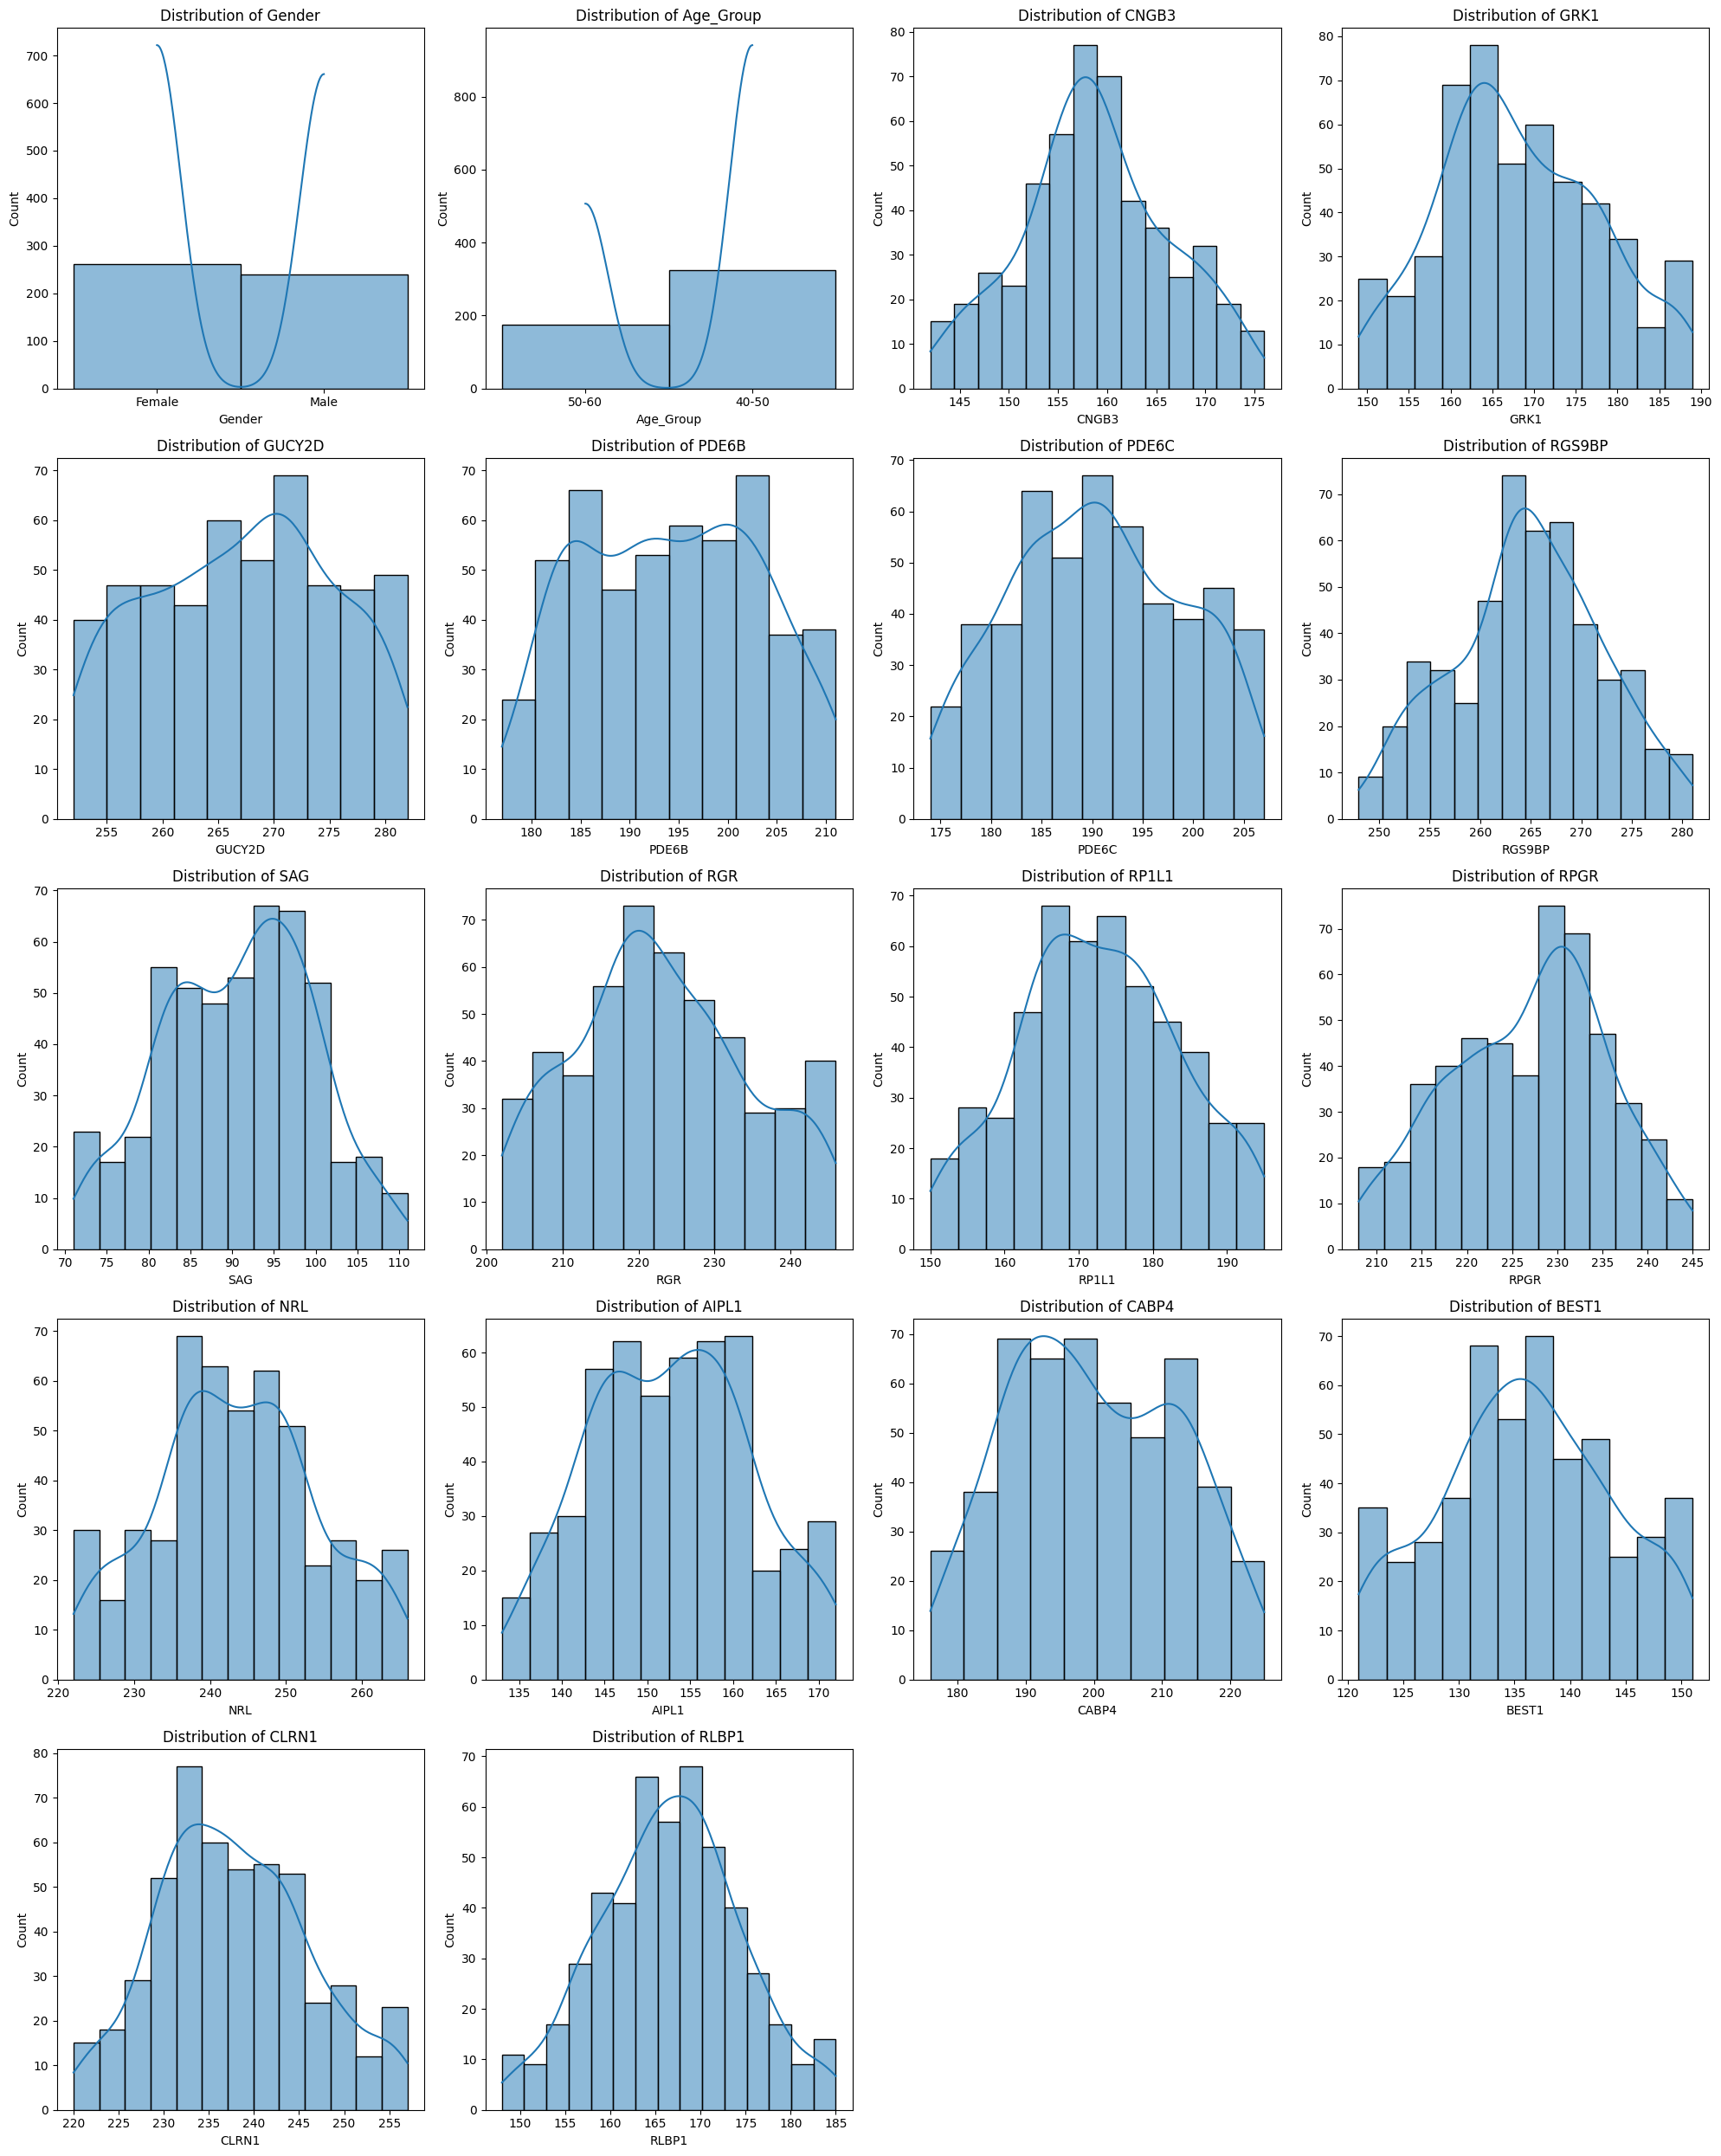

In [9]:
# Data distribution of all columns among the samples
# Number of columns to be plotted
num_columns = len(df_visual_perception.columns) - 1  # Subtracting 1 to exclude the first column

# Calculate the number of rows and columns needed
num_cols = 4
num_rows = (num_columns // num_cols) + (num_columns % num_cols != 0)

# Visualize the distribution of each peptide
plt.figure(figsize=(20, num_rows * 5))  # Adjust height based on the number of rows
for i, column in enumerate(df_visual_perception.columns[1:], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_visual_perception[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

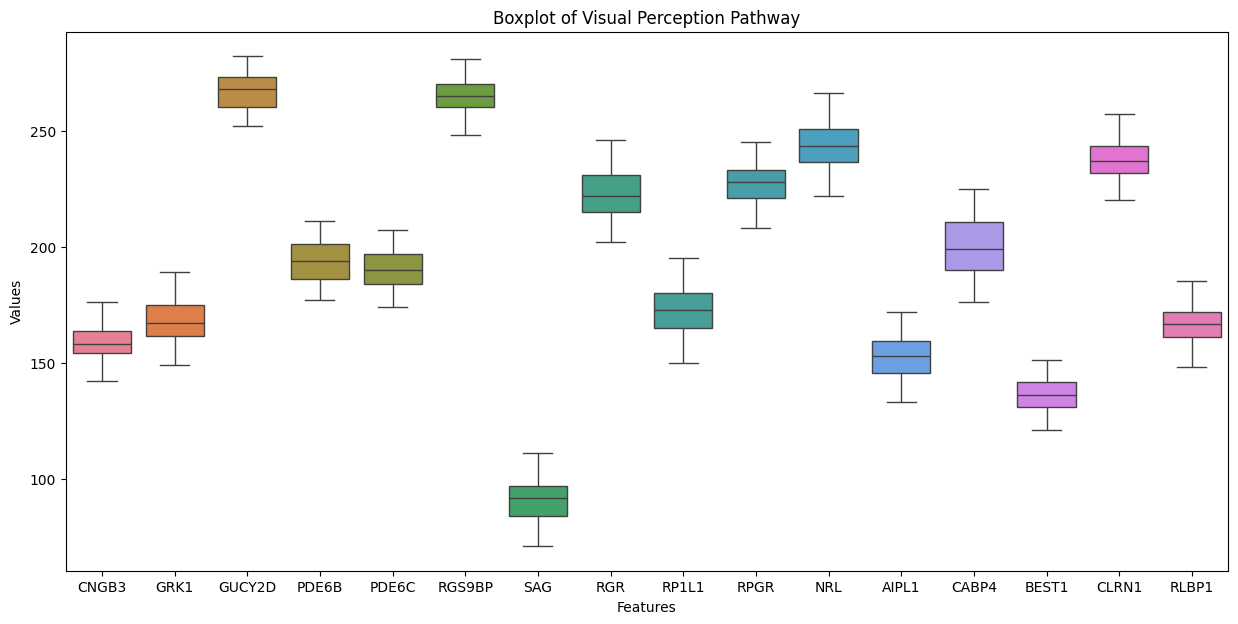

In [10]:
# Boxplot
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_visual_perception)

plt.title("Boxplot of Visual Perception Pathway")
plt.ylabel("Values")
plt.xlabel("Features")
plt.show()


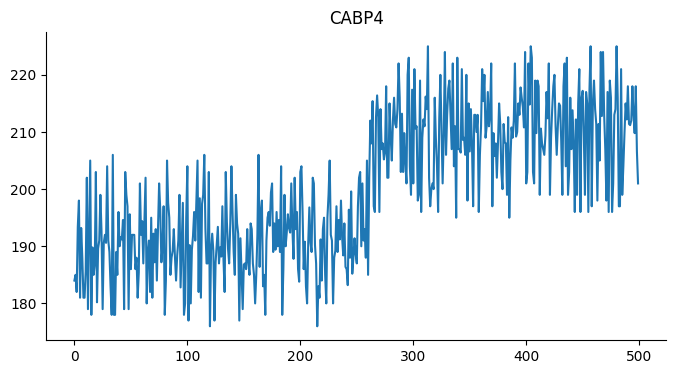

In [11]:
# CABP4 in samples

df_visual_perception['CABP4'].plot(kind='line', figsize=(8, 4), title='CABP4')
plt.gca().spines[['top', 'right']].set_visible(False)

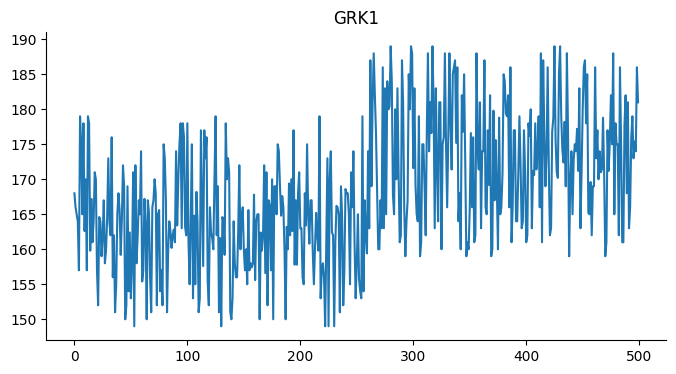

In [12]:
# GRK1 in samples

df_visual_perception['GRK1'].plot(kind='line', figsize=(8, 4), title='GRK1')
plt.gca().spines[['top', 'right']].set_visible(False)

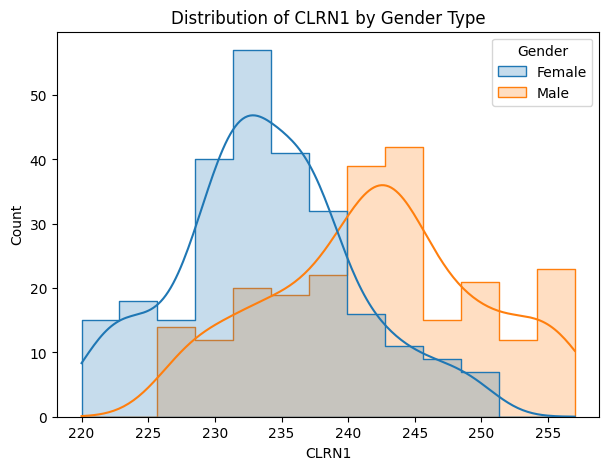

In [13]:
# Distribution plot for 'CLRN1'
plt.figure(figsize=(7, 5))
sns.histplot(data=df_visual_perception, x='CLRN1', hue='Gender', kde=True, element="step")
plt.title('Distribution of CLRN1 by Gender Type')
plt.show()

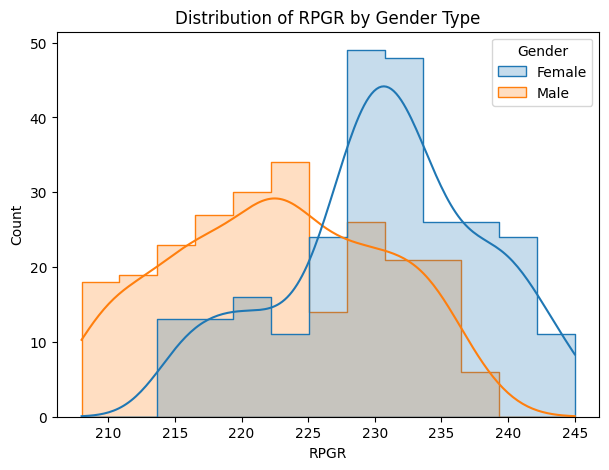

In [14]:
# Distribution plot for RPGR
plt.figure(figsize=(7, 5))
sns.histplot(data=df_visual_perception, x='RPGR', hue='Gender', kde=True, element="step")
plt.title('Distribution of RPGR by Gender Type')
plt.show()

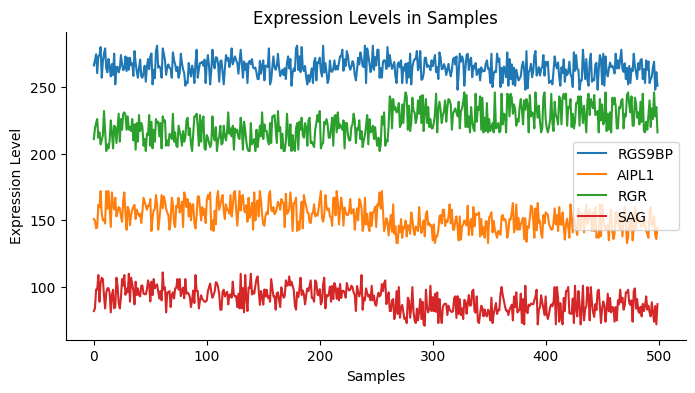

In [15]:
# Plotting proteins
df_visual_perception[["RGS9BP", 'AIPL1', "RGR", "SAG"]].plot(kind='line', figsize=(8, 4), title='Expression Levels in Samples')

# Removing top and right spines for cleaner appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels to x and y axes
plt.xlabel('Samples')
plt.ylabel('Expression Level')

# Displaying the plot
plt.show()


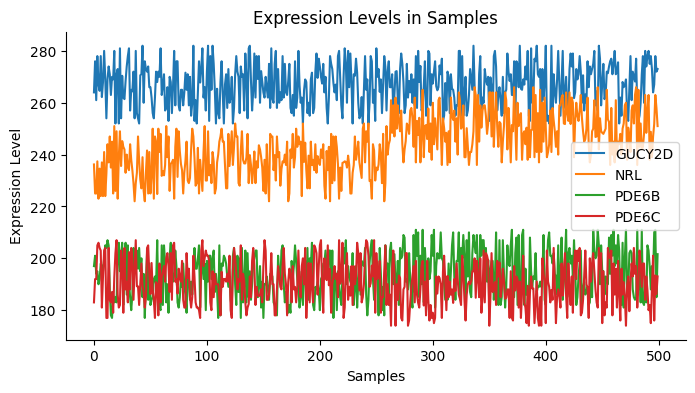

In [16]:
# Plotting proteins
df_visual_perception[["GUCY2D", 'NRL', "PDE6B", "PDE6C"]].plot(kind='line', figsize=(8, 4), title='Expression Levels in Samples')

# Removing top and right spines for cleaner appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels to x and y axes
plt.xlabel('Samples')
plt.ylabel('Expression Level')

# Displaying the plot
plt.show()


Here, we calculated the frequency of each protein across samples, along with their average concentration (mean) and standard deviation. Additionally, we determined the standard deviation as a percentage of the mean expression, known as the coefficient of variation (CV). This provides a relative measure of the variability in expression levels.

In [17]:
# dictionary to store results for each protein
protein_stats = {}

for protein in df_visual_perception.columns[3:]:
    expression_data = df_visual_perception[protein]

    # Frequency (percentage of patients expressing the protein)
    frequency = round((expression_data > 0).sum() / len(expression_data) * 100, 3)

    # Spectral Counting Mean (average concentration)
    mean_expression = round(expression_data.mean(), 3)

    # Standard Deviation and Percentage (mean expression)
    std_dev = round(expression_data.std(), 3)
    std_dev_percentage_cv = round((std_dev / mean_expression) * 100, 3) if mean_expression != 0 else np.nan

    # store the results
    protein_stats[protein] = {
        'Frequency (%)': frequency,
        'Mean Expression': mean_expression,
        'Standard Deviation': std_dev,
        'CV (%)': std_dev_percentage_cv
    }

# convert to DataFrame
protein_stats_df = pd.DataFrame(protein_stats).T

In [18]:
protein_stats_df     # columns statistical analysis

,Frequency (%),Mean Expression,Standard Deviation,CV (%)
CNGB3,100.0,158.816,7.570,4.767
GRK1,100.0,168.220,9.583,5.697
GUCY2D,100.0,267.034,8.418,3.152
PDE6B,100.0,194.172,9.038,4.655
PDE6C,100.0,190.498,8.555,4.491
RGS9BP,100.0,264.720,7.313,2.763
SAG,100.0,90.704,8.873,9.782
RGR,100.0,222.922,11.579,5.194
RP1L1,100.0,172.789,10.853,6.281
RPGR,100.0,226.882,8.689,3.830


In [19]:
df_corr = df_visual_perception.iloc[:, 3:]    # correlation among columns
df_corr.corr()

,CNGB3,GRK1,GUCY2D,PDE6B,PDE6C,RGS9BP,SAG,RGR,RP1L1,RPGR,NRL,AIPL1,CABP4,BEST1,CLRN1,RLBP1
CNGB3,1.000000,0.047109,-0.000364,0.065124,-0.130127,-0.004292,0.018916,0.129761,-0.163839,-0.117979,0.127056,-0.023148,0.181786,-0.021287,0.055176,0.117717
GRK1,0.047109,1.000000,-0.001379,0.167968,-0.131726,-0.143648,-0.350331,0.306863,-0.422355,-0.276508,0.324990,-0.315551,0.454052,-0.023733,0.252338,0.229678
GUCY2D,-0.000364,-0.001379,1.000000,0.035551,0.047999,0.040497,0.001138,-0.006116,0.009519,-0.104325,0.011144,-0.069735,0.039796,0.039435,-0.003555,-0.063498
PDE6B,0.065124,0.167968,0.035551,1.000000,-0.002435,-0.035116,-0.192375,0.097247,-0.135821,-0.119581,0.059582,-0.161068,0.172589,-0.024673,0.081817,0.152207
PDE6C,-0.130127,-0.131726,0.047999,-0.002435,1.000000,0.151091,0.142947,-0.118480,0.119088,0.015431,-0.144194,0.077992,-0.135040,-0.057627,-0.041309,-0.021716
RGS9BP,-0.004292,-0.143648,0.040497,-0.035116,0.151091,1.000000,0.079425,-0.031629,0.074307,0.037340,-0.191834,0.114842,-0.157043,-0.027651,-0.076355,-0.013105
SAG,0.018916,-0.350331,0.001138,-0.192375,0.142947,0.079425,1.000000,-0.344202,0.422262,0.252773,-0.444266,0.332855,-0.425123,0.003246,-0.354357,-0.314424
RGR,0.129761,0.306863,-0.006116,0.097247,-0.118480,-0.031629,-0.344202,1.000000,-0.497778,-0.300854,0.408382,-0.386445,0.474544,0.048716,0.327481,0.281611
RP1L1,-0.163839,-0.422355,0.009519,-0.135821,0.119088,0.074307,0.422262,-0.497778,1.000000,0.259297,-0.458122,0.454430,-0.550576,0.061988,-0.369389,-0.318700
RPGR,-0.117979,-0.276508,-0.104325,-0.119581,0.015431,0.037340,0.252773,-0.300854,0.259297,1.000000,-0.305126,0.242087,-0.387346,-0.010646,-0.273064,-0.186865


Positive Correlations: Strong positive correlations are seen between CABP4 & NRL (0.486) and CABP4 & RGR (0.474), suggesting co-regulation or shared pathways.

Negative Correlations: Strong negative correlations are observed between RP1L1 & CABP4 (-0.550) and RP1L1 & RGR (-0.497), indicating opposing roles.

Overall, genes like CABP4, RGR, and NRL are central, showing significant correlations, suggesting they may play key roles in visual perception processes.

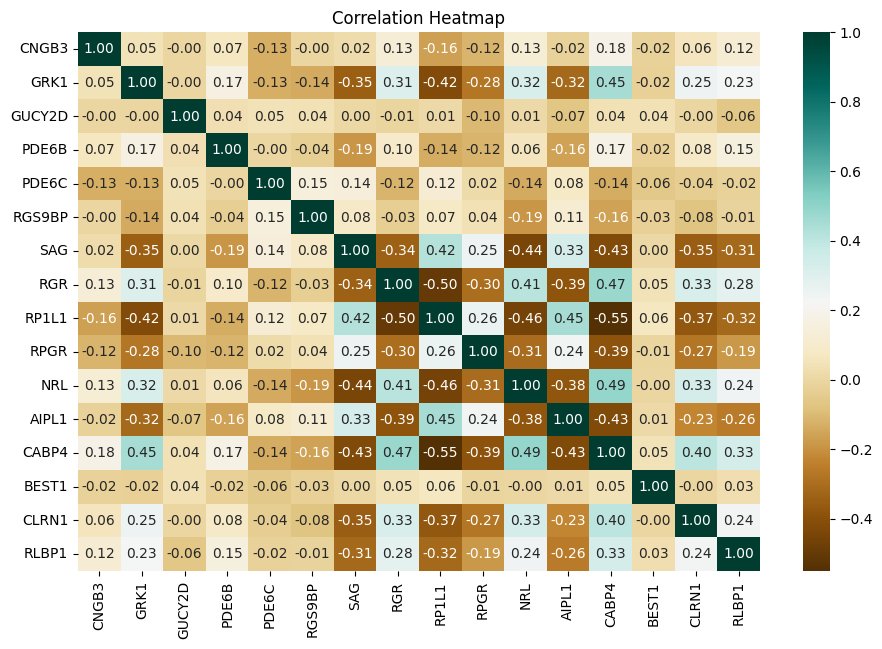

In [20]:
# Correlation Heatmap
plt.figure(figsize=(11, 7))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Performed statistical tests to identify proteins that show significant differences in expression levels between different genders (male and female) and between different age groups (40-50 and 50-60).

In [21]:
# Segregate data by gender and age group
males = df_visual_perception[df_visual_perception['Gender'] == 'Male']
females = df_visual_perception[df_visual_perception['Gender'] == 'Female']

age_40_50 = df_visual_perception[df_visual_perception['Age_Group'] == '40-50']
age_50_60 = df_visual_perception[df_visual_perception['Age_Group'] == '50-60']

# List to store significant proteins
significant_proteins_gender = []
significant_proteins_age = []

for protein in df_visual_perception.columns[3:]:
    # Gender differences (t-test)
    t_stat, p_val_gender = ttest_ind(males[protein], females[protein], nan_policy='omit')
    if p_val_gender < 0.05:
        significant_proteins_gender.append(protein)

    # Age group differences (t-test)
    t_stat, p_val_age = ttest_ind(age_40_50[protein], age_50_60[protein], nan_policy='omit')
    if p_val_age < 0.05:
        significant_proteins_age.append(protein)

print("Proteins with significant differences between genders:", significant_proteins_gender)
print("Proteins with significant differences between age groups:", significant_proteins_age)


Proteins with significant differences between genders: ['CNGB3', 'GRK1', 'PDE6B', 'PDE6C', 'RGS9BP', 'SAG', 'RGR', 'RP1L1', 'RPGR', 'NRL', 'AIPL1', 'CABP4', 'CLRN1', 'RLBP1']
Proteins with significant differences between age groups: []


In [22]:
print('Number of significant proteins:', len(significant_proteins_gender))
print('Number of significant proteins:', len(significant_proteins_age))

Number of significant proteins: 14
Number of significant proteins: 0


In [23]:
# Convert Gender and Age_Group columns to categorical type
df_1['Gender'] = df_1['Gender'].astype('category')
df_1['Age_Group'] = df_1['Age_Group'].astype('category')

# pathway dictionary
pathways = {
    "Inflammation": ["COX2", "CFB", "CFD", "CFHR1", "TIMP3", "VEGFA", "LTB4R", "LTE4"],
    "Oxidative_Stress": ["APOD", "APOE", "ARSG", "HMCN1"],
    "Immunity": ["C2", "C3"],
    "Apoptosis": ["CAPN5", "TIMP3", "RB1"],
    "Aging": ["APOE", "ARMS2", "PRPF4", "GRK1"],
    "Visual_Perception": ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"],
    "Ciliopathy": ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"],
    "Lipid_Metabolism": ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"],
    "Cellular_Transport": ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"],
    "Signal_Transduction": ["NEK2", "PRDM13", "TSPAN12"]
}

# Select the pathway to analyze
selected_pathway = "Visual_Perception"  # Change this to analyze a different pathway

# Subset the DataFrame for the selected pathway
proteins = pathways[selected_pathway]
df_pathway_stat = df_1[proteins + ['Gender', 'Age_Group']]

# Summary statistics for the selected pathway
summary_stats = df_pathway_stat.groupby(['Gender', 'Age_Group'])[proteins].agg(['mean', 'median', 'std'])
print(f"Summary Statistics for {selected_pathway} Pathway:")
print(summary_stats)


<ipython-input-23-51c8304476b6>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_pathway_stat.groupby(['Gender', 'Age_Group'])[proteins].agg(['mean', 'median', 'std'])


Summary Statistics for Visual_Perception Pathway:
                       CNGB3                         GRK1                   \
                        mean median       std        mean median       std   
Gender Age_Group                                                             
Female 40-50      157.085227  157.6  7.346183  163.431818  164.0  7.379904   
       50-60      157.908235  157.2  8.090591  162.896471  163.0  7.838708   
Male   40-50      160.441611  159.8  6.982537  173.634899  174.0  8.843099   
       50-60      160.364444  159.1  7.663870  173.646667  175.0  8.274724   

                      GUCY2D                        PDE6B  ...     CABP4  \
                        mean median       std        mean  ...       std   
Gender Age_Group                                           ...             
Female 40-50      266.468182  266.8  8.545750  192.312500  ...  7.278708   
       50-60      267.364706  268.0  8.228127  192.764706  ...  6.800666   
Male   40-50      267.0

In [24]:
# # Display summary statistics as a DataFrame
# summary_stats_df = pd.DataFrame(summary_stats)
# display(summary_stats_df)

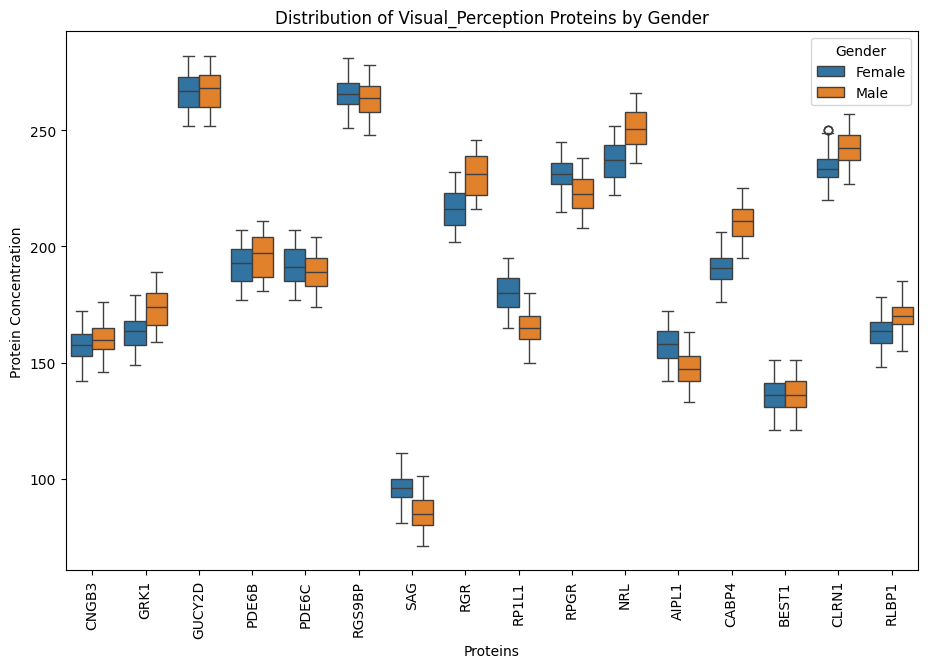

In [25]:
# Visualization: Distribution by Gender
plt.figure(figsize=(11, 7))
sns.boxplot(data=df_pathway.melt(id_vars=['Gender', 'Age_Group'], value_vars=proteins),
            x='variable', y='value', hue='Gender')
plt.title(f"Distribution of {selected_pathway} Proteins by Gender")
plt.xticks(rotation=90)
plt.ylabel("Protein Concentration")
plt.xlabel("Proteins")
plt.show()

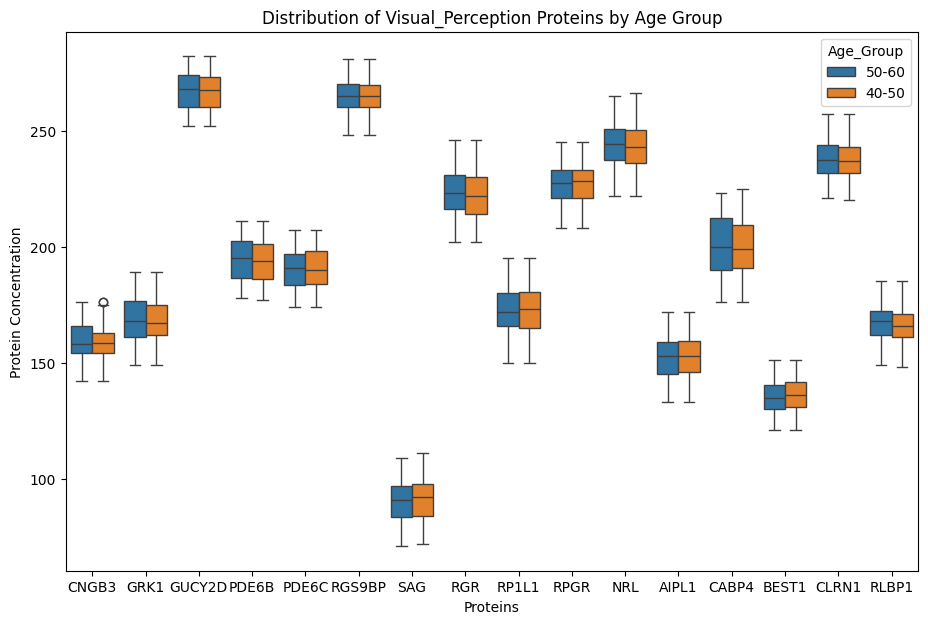

In [26]:
# Visualization: Distribution by Age Group
plt.figure(figsize=(11, 7))
sns.boxplot(data=df_pathway.melt(id_vars=['Gender', 'Age_Group'], value_vars=proteins),
            x='variable', y='value', hue='Age_Group')
plt.title(f"Distribution of {selected_pathway} Proteins by Age Group")
# plt.xticks(rotation=90)
plt.ylabel("Protein Concentration")
plt.xlabel("Proteins")
plt.show()

Here, we normalized the spectral counting data and categorized the proteins based on their expression levels.

In [27]:
p_columns = df_visual_perception.columns[3:]  # protein columns

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized = df_visual_perception.copy()
df_normalized[p_columns] = scaler.fit_transform(df_visual_perception[p_columns])

# Categorize proteins
def categorize_expression_level(value):
    if value >= 0.7:
        return 'Highly Expressed'
    elif value <= 0.3:
        return 'Lowly Expressed'
    else:
        return 'Moderately Expressed'

# Apply categorization to each protein column
df_categorized = df_normalized.copy()
for col in p_columns:
    df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

# categorization results
summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
summary = summary.transpose()

# Display the summary
print(summary)

        Highly Expressed  Lowly Expressed  Moderately Expressed
CNGB3                103               91                   306
GRK1                  94              108                   298
GUCY2D               125              141                   234
PDE6B                144              142                   214
PDE6C                122              119                   259
RGS9BP                92               96                   312
SAG                   97              102                   301
RGR                  107              126                   267
RP1L1                110               95                   295
RPGR                 113              112                   275
NRL                   93              104                   303
AIPL1                103              104                   293
CABP4                128              133                   239
BEST1                122              121                   257
CLRN1                 86              11

In [28]:
# convert the result summary in a DataFrame
summary_df = summary.reset_index()
summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']
summary_df

,Protein,Highly Expressed,Lowly Expressed,Moderately Expressed
0,CNGB3,103,91,306
1,GRK1,94,108,298
2,GUCY2D,125,141,234
3,PDE6B,144,142,214
4,PDE6C,122,119,259
5,RGS9BP,92,96,312
6,SAG,97,102,301
7,RGR,107,126,267
8,RP1L1,110,95,295
9,RPGR,113,112,275


In [29]:
# Function to normalize and categorize proteins
def normalize_and_categorize(df, p_columns):
    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[p_columns] = scaler.fit_transform(df[p_columns])

    # Apply categorization to each protein column
    df_categorized = df_normalized.copy()
    for col in p_columns:
        df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

    # Summarize the categorization results
    summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
    summary = summary.transpose()

    # Convert the result summary into a DataFrame
    summary_df = summary.reset_index()
    summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']
    return summary_df

# Normalize and categorize for Male
summary_male_df = normalize_and_categorize(males, p_columns)

# Normalize and categorize for Female
summary_female_df = normalize_and_categorize(females, p_columns)

# Display the results
print("Summary for Males:")
print(summary_male_df)

print("\nSummary for Females:")
print(summary_female_df)

Summary for Males:
   Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0    CNGB3                51               46                   142
1     GRK1                64               73                   102
2   GUCY2D                63               66                   110
3    PDE6B                77               82                    80
4    PDE6C                67               68                   104
5   RGS9BP                63               51                   125
6      SAG                47               62                   130
7      RGR                70               85                    84
8    RP1L1                53               55                   131
9     RPGR                57               71                   111
10     NRL                71               71                    97
11   AIPL1                45               62                   132
12   CABP4                61               59                   119
13   BEST1                63 

In [30]:
# Normalize and categorize for Age 40-50
summary_age_40_50_df = normalize_and_categorize(age_40_50, p_columns)

# Normalize and categorize for Age 50-60
summary_age_50_60_df = normalize_and_categorize(age_50_60, p_columns)

# Display the results
print("Summary for Age 40-50:")
print(summary_age_40_50_df)

print("\nSummary for Age 50-60:")
print(summary_age_50_60_df)

Summary for Age 40-50:
   Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0    CNGB3                59               61                   205
1     GRK1                58               68                   199
2   GUCY2D                79               94                   152
3    PDE6B                86               95                   144
4    PDE6C                82               75                   168
5   RGS9BP                58               61                   206
6      SAG                62               76                   187
7      RGR                66               87                   172
8    RP1L1                74               70                   181
9     RPGR                73               71                   181
10     NRL                64               75                   186
11   AIPL1                69               61                   195
12   CABP4                74               84                   167
13   BEST1               

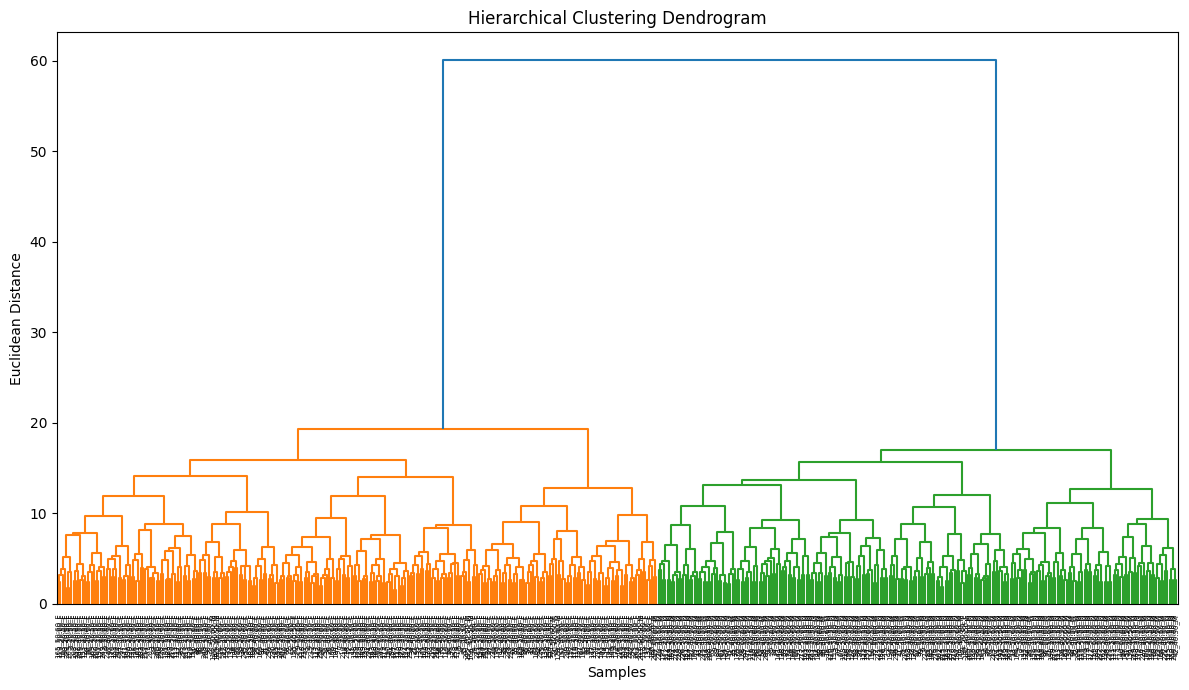

In [31]:
# Select only the protein columns for clustering
protein_columns = ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"]
df_proteins = df_visual_perception[protein_columns]

# Standardize the data
ss_scaler = StandardScaler()
df_proteins_scaled = ss_scaler.fit_transform(df_proteins)

# Perform hierarchical clustering
linkage_matrix = linkage(df_proteins_scaled, method='ward')

# Create a dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linkage_matrix, labels=df_visual_perception['Samples'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [32]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 2  # Adjust this number as needed
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Create a DataFrame to easily view the sample names with their corresponding clusters
df_clusters_d = pd.DataFrame({
    'Sample': df_visual_perception['Samples'],
    'Cluster': cluster_labels
})

# Group the samples by their cluster
clusters = df_clusters_d.groupby('Cluster')['Sample'].apply(list).to_dict()

# Print each cluster as a list
for cluster_id, samples in clusters.items():
    print(f"Cluster {cluster_id}: {samples}\n")

Cluster 1: ['48_50:60_F', '182_40:50_F', '1_50:60_M', '2_40:50_M', '3_40:50_M', '4_40:50_M', '5_50:60_M', '6_40:50_M', '7_50:60_M', '8_40:50_M', '9_50:60_M', '10_40:50_M', '11_40:50_M', '12_40:50_M', '13_50:60_M', '14_40:50_M', '15_50:60_M', '16_40:50_M', '17_40:50_M', '18_50:60_M', '19_40:50_M', '20_40:50_M', '21_50:60_M', '22_40:50_M', '23_40:50_M', '24_50:60_M', '25_40:50_M', '26_40:50_M', '27_50:60_M', '28_40:50_M', '29_40:50_M', '30_50:60_M', '31_40:50_M', '32_40:50_M', '33_50:60_M', '34_40:50_M', '35_50:60_M', '36_40:50_M', '37_40:50_M', '38_50:60_M', '39_40:50_M', '40_40:50_M', '41_50:60_M', '42_40:50_M', '43_50:60_M', '44_40:50_M', '45_40:50_M', '46_50:60_M', '48_40:50_M', '49_50:60_M', '50_40:50_M', '51_40:50_M', '52_50:60_M', '53_40:50_M', '54_40:50_M', '56_40:50_M', '57_40:50_M', '58_50:60_M', '59_40:50_M', '60_40:50_M', '61_50:60_M', '62_40:50_M', '63_50:60_M', '64_40:50_M', '65_50:60_M', '66_40:50_M', '67_50:60_M', '68_40:50_M', '69_50:60_M', '70_40:50_M', '71_40:50_M', '7

In [33]:
cluster_counts = df_clusters_d['Cluster'].value_counts()
cluster_counts

,count
Cluster,
2,268
1,232


Performed clustering to identify natural groupings or patterns in our data. We used K-means algorithm and Elbow method to determine the optimal number of clusters by plotting the Within-Cluster Sum of Square (WCSS) against different numbers of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

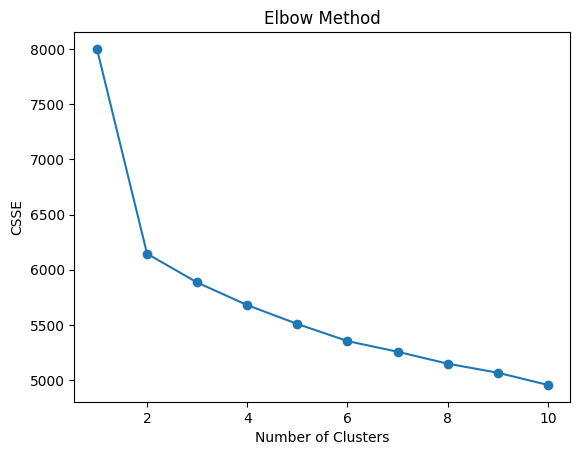

In [34]:
pro_columns = df_visual_perception.columns[3:]

# Data Standardization/Normalization
s_scaler = StandardScaler()
# m_scaler = MinMaxScaler()
X = s_scaler.fit_transform(df_visual_perception[pro_columns])

k_rang = range(1, 11)
csse = []

for k in k_rang:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    csse.append(kmeans.inertia_)    # sum of square error

# Plotting the Elbow Curve
plt.plot(k_rang, csse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CSSE')
plt.show()

In [35]:
csse

[7999.999999999995,
 6145.467902325304,
 5884.72965547068,
 5679.671639616838,
 5509.210405264497,
 5354.215215679493,
 5257.455773801771,
 5149.282308928031,
 5067.585652585194,
 4956.883932624155]

In [36]:
# K-means Clustering (optimal k based on the Elbow plot)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X)
print(clusters)

# Add cluster labels to the DataFrame
df_cluster = df_visual_perception.copy()
df_cluster['Cluster'] = clusters

# print the DataFrame
df_cluster

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Samples,Gender,Age_Group,CNGB3,GRK1,GUCY2D,PDE6B,PDE6C,RGS9BP,SAG,RGR,RP1L1,RPGR,NRL,AIPL1,CABP4,BEST1,CLRN1,RLBP1,Cluster
0,1_50:60_F,Female,50-60,146.0,168.0,264.0,197.0,183.0,266.2,82.0,211,180.0,234.4,236.2,151.0,184.0,143.0,233.4,162.4,1
1,2_50:60_F,Female,50-60,154.0,166.0,276.0,201.0,192.0,270.0,84.0,219,167.0,234.2,225.0,150.0,185.0,138.0,228.0,160.0,1
2,3_40:50_F,Female,40-50,166.0,165.0,261.0,194.0,192.0,274.6,98.2,223,168.0,240.0,225.0,144.0,182.0,122.0,231.8,164.8,1
3,4_40:50_F,Female,40-50,158.0,164.0,278.0,195.0,205.0,260.4,98.0,226,182.0,234.8,237.4,145.0,193.4,139.6,250.0,158.4,1
4,5_50:60_F,Female,50-60,159.2,157.0,267.0,190.0,206.0,273.0,109.0,212,182.0,237.0,223.0,161.6,198.0,131.6,238.0,155.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,235_50:60_M,Male,50-60,172.0,173.0,264.0,193.0,201.0,265.0,81.0,226,176.0,224.0,247.0,147.0,213.0,121.0,256.0,170.0,0
496,236_40:50_M,Male,40-50,174.0,175.4,267.0,210.0,176.0,269.0,74.0,246,158.0,213.0,251.8,153.2,209.8,136.0,252.0,172.0,0
497,237_50:60_M,Male,50-60,161.4,174.0,278.0,211.0,193.4,248.0,85.8,228,166.2,221.0,263.0,139.0,218.0,127.0,255.0,168.6,0
498,238_40:50_M,Male,40-50,149.0,186.0,272.0,185.0,186.2,261.2,72.0,235,155.0,209.0,258.0,136.0,206.6,143.0,255.0,174.2,0


In [37]:
# Group the DataFrame by the 'Cluster' column
clustered_samples = df_cluster.groupby('Cluster')['Samples'].apply(list)

# Print the sample names for each cluster
for cluster, samples in clustered_samples.items():
    print(f"Cluster {cluster}:")
    print(samples)
    print("\n")


Cluster 0:
['116_50:60_F', '1_50:60_M', '2_40:50_M', '3_40:50_M', '4_40:50_M', '5_50:60_M', '6_40:50_M', '7_50:60_M', '8_40:50_M', '9_50:60_M', '10_40:50_M', '11_40:50_M', '12_40:50_M', '13_50:60_M', '14_40:50_M', '15_50:60_M', '16_40:50_M', '17_40:50_M', '18_50:60_M', '19_40:50_M', '20_40:50_M', '21_50:60_M', '22_40:50_M', '23_40:50_M', '24_50:60_M', '25_40:50_M', '26_40:50_M', '27_50:60_M', '28_40:50_M', '29_40:50_M', '30_50:60_M', '31_40:50_M', '32_40:50_M', '33_50:60_M', '34_40:50_M', '35_50:60_M', '36_40:50_M', '37_40:50_M', '38_50:60_M', '39_40:50_M', '40_40:50_M', '41_50:60_M', '42_40:50_M', '43_50:60_M', '44_40:50_M', '45_40:50_M', '46_50:60_M', '47_50:60_M', '48_40:50_M', '49_50:60_M', '50_40:50_M', '51_40:50_M', '52_50:60_M', '53_40:50_M', '54_40:50_M', '56_40:50_M', '57_40:50_M', '58_50:60_M', '59_40:50_M', '60_40:50_M', '61_50:60_M', '62_40:50_M', '63_50:60_M', '64_40:50_M', '65_50:60_M', '66_40:50_M', '67_50:60_M', '68_40:50_M', '69_50:60_M', '70_40:50_M', '71_40:50_M', '7

In [38]:
# kmeans.cluster_centers_

df_cluster.value_counts('Cluster')

,count
Cluster,
1,262
0,238


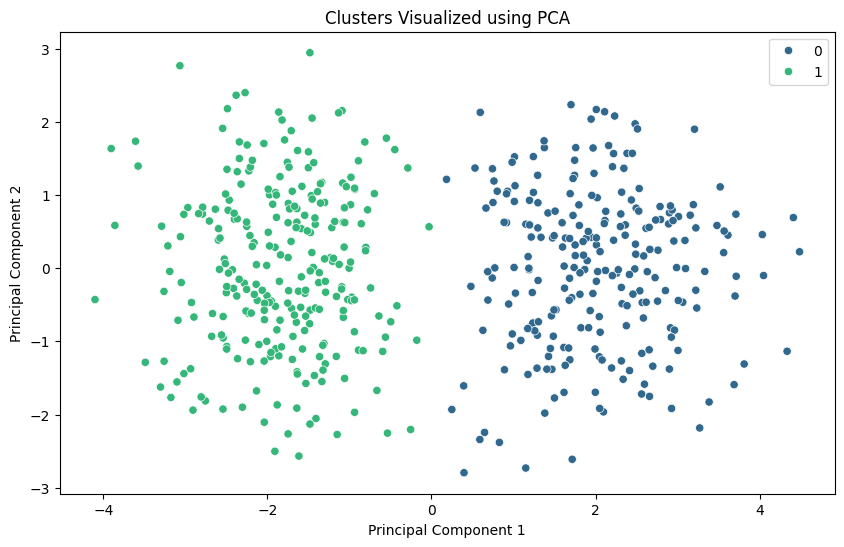

In [39]:
# Visualize the Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

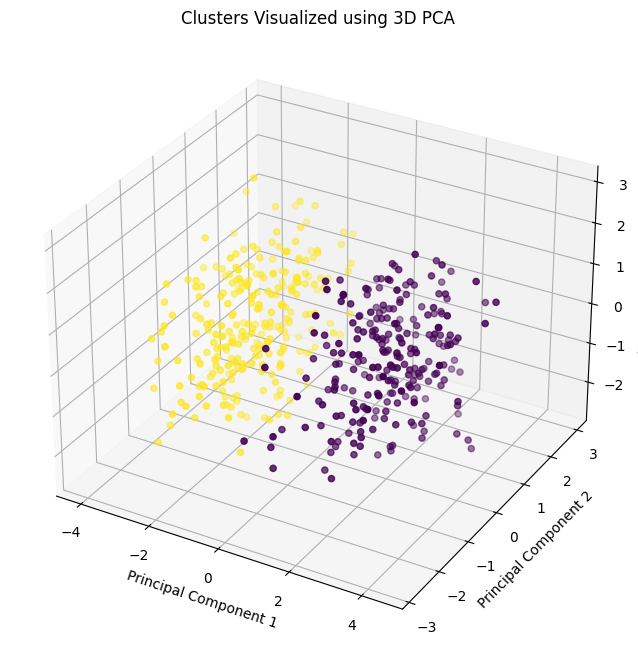

In [40]:
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis')
ax.set_title('Clusters Visualized using 3D PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
